# Numerical Exercises 3

In [19]:
import numpy as np
import matplotlib.pyplot as plt

csv_path = "./CSV/"
axs_title = ["Call option", "Put option"]
y_labels = [r"$C-\bar{C}$", r"$P-\bar{P}$"]

In this exercise I will verify whether the numerical simulation of an European Call and Put option price is coherent with the analytical results given by the underlying Black-Scholes theory. According to this model the time evolution of an asset price $S(t)$ is stochastic and can be interpreted as a Geometric Brownian Motion with drift $\mu = r$ (with $r$ given by the risk-free interest rate) and diffusion coefficient $\sigma^2$ (with $\sigma$ given by the market volatility). From this assumption the analytic expression of $S(t)$ is given by: $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
where $W(t)\sim\mathcal{N}(0,t)$. 
It is then possible to discretely sample $S(t)$ recursively (we then only need to know $S(0)$ and the GBM parameters), using the formula: $$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
with $Z_i \sim \mathcal{N}(0,1)$. 
At this point we have all the required ingredients to compute the optimal Call and Put option prices at time $T$ ($C(T)$ and $P(T)$) as follows: $$C(T)=e^{-rT}max(0, S(T)-K)\quad P(T)=e^{-rT}max(0, K-S(T))$$
where $K$ is the prescribed option price. 
In the simulations I used $10^4$ repetitions of the sampling procedure, grouped into $100$ blocks so as to compute the average asset prices and their statistical uncertainties using data blocking. The required market and option parameters are here summarized:

- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

## 3.1.1

At first I will directly sample $S(T)$, i.e. the sampling procedure consists of a single step from $t_0 = 0$ to $t_1 = T$. The results will be compared with the analytical solution of the Black-Scholes model given by: $$\bar{C}(T) = 14.975790778311286\quad \bar{P}(T)=5.4595325819072364$$

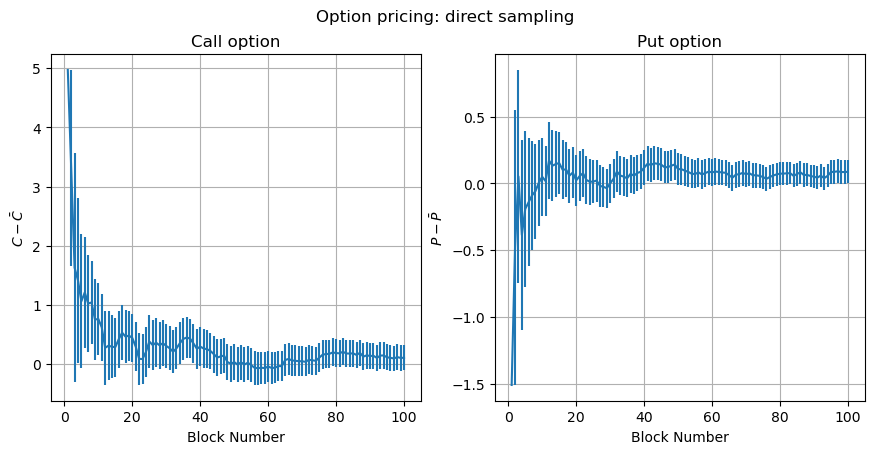

Delta C(T): 0.10590922168871408	Error: 0.213464
Delta P(T): 0.08709741809276395	Error: 0.0861599


In [29]:
direct_data = np.loadtxt(csv_path + "Ex3_1_dir.csv", delimiter=',')
direct_data[:,0] = direct_data[:,0] - 14.975790778311286
direct_data[:,2] = direct_data[:,2] - 5.4595325819072364

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10.5, 4.5)

for i in range(0, 4, 2):

    axs[int(i / 2)].errorbar(np.arange(1,101,1), direct_data[:,i], yerr=direct_data[:,i+1])
    axs[int(i / 2)].set_xlabel("Block Number")
    axs[int(i / 2)].set_ylabel(y_labels[int(i / 2)])    
    axs[int(i / 2)].set_title(axs_title[int(i / 2)])
    axs[int(i / 2)].grid(True)

fig.suptitle("Option pricing: direct sampling")
plt.show()

print("Delta C(T): {}\tError: {}".format(direct_data[-1,0], direct_data[-1,1]))
print("Delta P(T): {}\tError: {}".format(direct_data[-1,2], direct_data[-1,3]))

The difference between the obtained and the theoretical value for both the Call and Put options is compatible with $0$ within $1$ standard deviation, thus indicating the coherence between simulation data and theory.

## 3.1.2

In this second part the GBM will be discretely sampled: the interval $[0, T]$ has been divide into $100$ sub-interval in each of which a direct sample as been applied. In such a way the final option price at time $T$ has been obtained by applying the recursion formula $100$ times. All the other parameters and procedures remained the same as before.

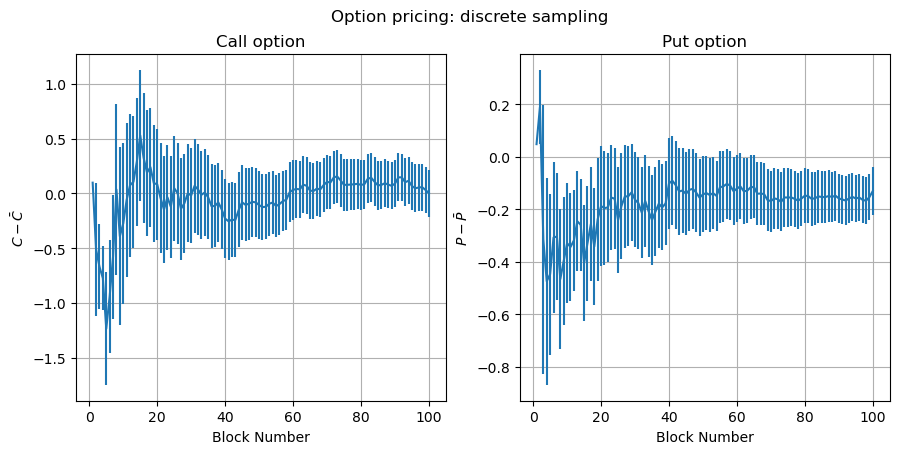

Delta C(T): 0.0019092216887148794	Error: 0.212725
Delta P(T): -0.1299725819072366	Error: 0.0909738


In [30]:
step_data = np.loadtxt(csv_path + "Ex3_1_step.csv", delimiter=',')
step_data[:,0] = step_data[:,0] - 14.975790778311286
step_data[:,2] = step_data[:,2] - 5.4595325819072364

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10.5, 4.5)

for i in range(0, 4, 2):

    axs[int(i / 2)].errorbar(np.arange(1,101,1), step_data[:,i], yerr=step_data[:,i+1])
    axs[int(i / 2)].set_xlabel("Block Number")
    axs[int(i / 2)].set_ylabel(y_labels[int(i / 2)])  
    axs[int(i / 2)].set_title(axs_title[int(i / 2)])
    axs[int(i / 2)].grid(True)

fig.suptitle("Option pricing: discrete sampling")
plt.show()

print("Delta C(T): {}\tError: {}".format(step_data[-1,0], step_data[-1,1]))
print("Delta P(T): {}\tError: {}".format(step_data[-1,2], step_data[-1,3]))

We can see that the simulation data are again compatible with the theoretical results. In this case however, the agreement is slightly worse for the put option pricing but, since the compatibility is still within two standard deviation, the result can indeed be accepted.